In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.cluster.hierarchy as sch

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Set plot style
sns.set_style('whitegrid')

In [2]:
!git clone 'https://github.com/HarshvardhanSingh-13/Datasets'

Cloning into 'Datasets'...
remote: Enumerating objects: 347, done.
remote: Counting objects: 100% (105/105), done.
remote: Compressing objects: 100% (90/90), done.
remote: Total 347 (delta 25), reused 0 (delta 0), pack-reused 242 (from 1)
Receiving objects: 100% (347/347), 302.89 MiB | 16.78 MiB/s, done.
Resolving deltas: 100% (139/139), done.
Updating files: 100% (245/245), done.


In [3]:
df = pd.read_csv('/content/Datasets/Mall Dataset/Mall_Customers.csv')

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df['Gender'].value_counts()

,count
Gender,
Female,112
Male,88


In [6]:
df.drop('CustomerID', axis = 1, inplace = True)

In [7]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


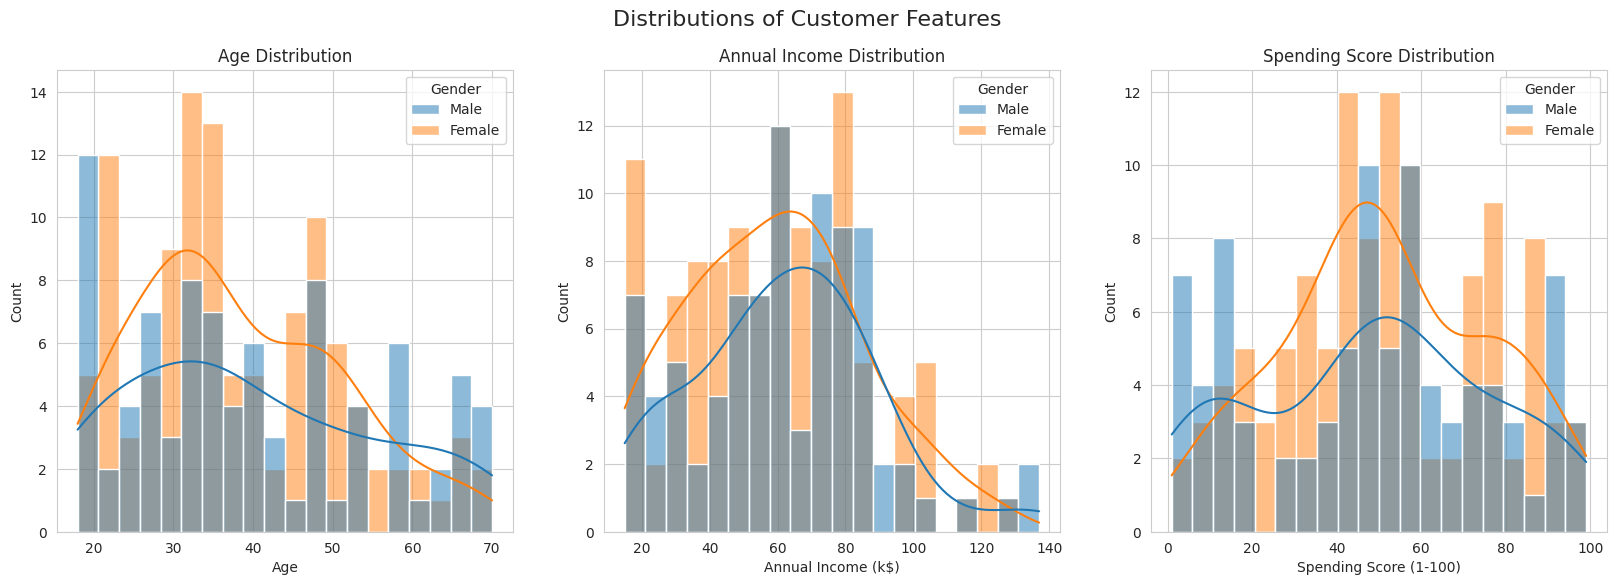

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Distributions of Customer Features', fontsize=16)

sns.histplot(ax=axes[0], data=df, x='Age', kde=True, bins=20, hue='Gender').set_title('Age Distribution')
sns.histplot(ax=axes[1], data=df, x='Annual Income (k$)', kde=True, bins=20, hue='Gender').set_title('Annual Income Distribution')
sns.histplot(ax=axes[2], data=df, x='Spending Score (1-100)', kde=True, bins=20, hue='Gender').set_title('Spending Score Distribution')

plt.show()

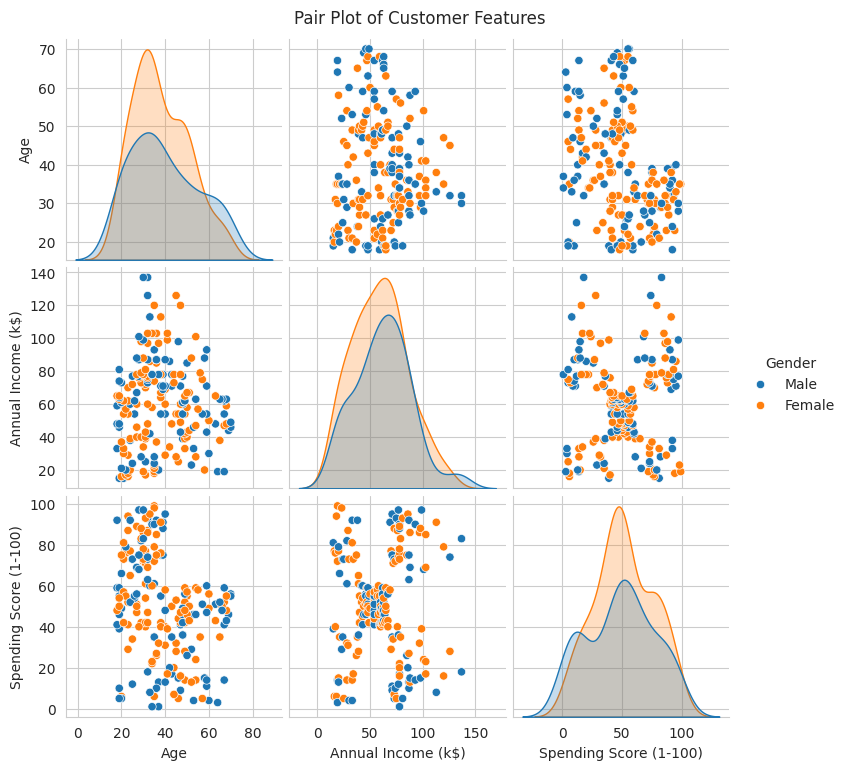

In [9]:
sns.pairplot(df, vars=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], hue='Gender', diag_kind='kde')
plt.suptitle('Pair Plot of Customer Features', y=1.02)
plt.show()

3D Visualizations

In [10]:
fig = px.scatter_3d(df,
                    x='Annual Income (k$)',
                    y='Spending Score (1-100)',
                    z='Age',
                    color='Gender',
                    title='3D View of Customer Data')
fig.show()

Creating Segmentaion Model 1 - Income vs Spending Score

In [11]:
X1 = df[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler1 = StandardScaler()
X1_scaled = scaler1.fit_transform(X1)

In [12]:
wcss1 = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X1_scaled)
    wcss1.append(kmeans.inertia_)

In [13]:
wcss1

[399.99999999999994,
 269.69101219276405,
 157.70400815035939,
 108.92131661364358,
 65.56840815571681,
 55.057348270385965,
 44.86475569922555,
 37.22818767758587,
 32.39226763033118,
 29.981897788243703]

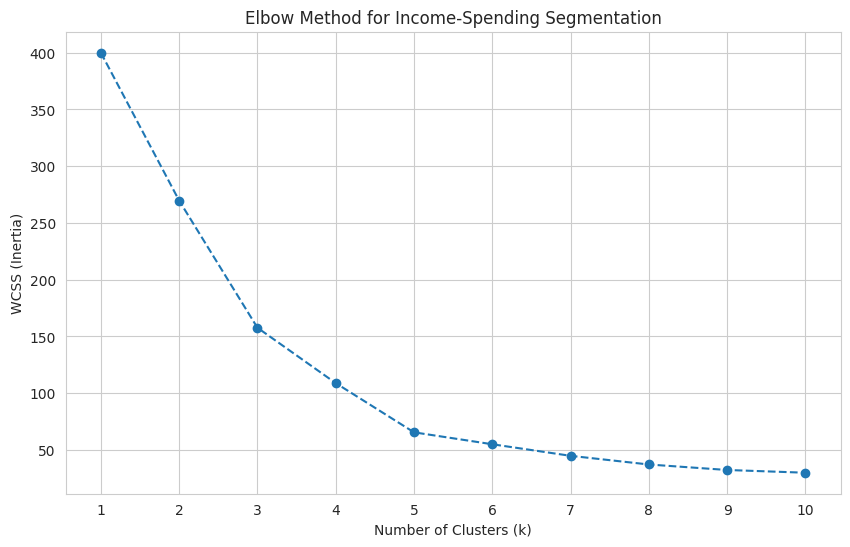

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss1, marker='o', linestyle='--')
plt.title('Elbow Method for Income-Spending Segmentation')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.xticks(range(1, 11))
plt.show()

Build and fit the model

In [15]:
kmeans1 = KMeans(n_clusters=5, init='k-means++', random_state=42, n_init=10)
df['Income_Cluster'] = kmeans1.fit_predict(X1_scaled)

Create Segmentation Model 2 - Age and Spending Score

In [16]:
X2 = df[['Age', 'Spending Score (1-100)']]
scaler2 = StandardScaler()
X2_scaled = scaler2.fit_transform(X2)

In [17]:
wcss2 = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X2_scaled)
    wcss2.append(kmeans.inertia_)

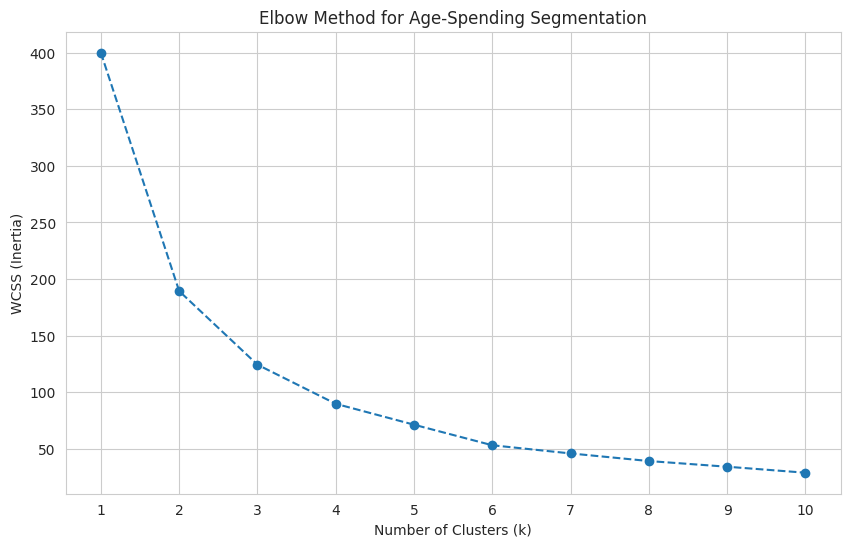

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss2, marker='o', linestyle='--')
plt.title('Elbow Method for Age-Spending Segmentation')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.xticks(range(1, 11))
plt.show()

In [19]:
kmeans2 = KMeans(n_clusters=4, init='k-means++', random_state=42, n_init=10)
df['Age_Cluster'] = kmeans2.fit_predict(X2_scaled)

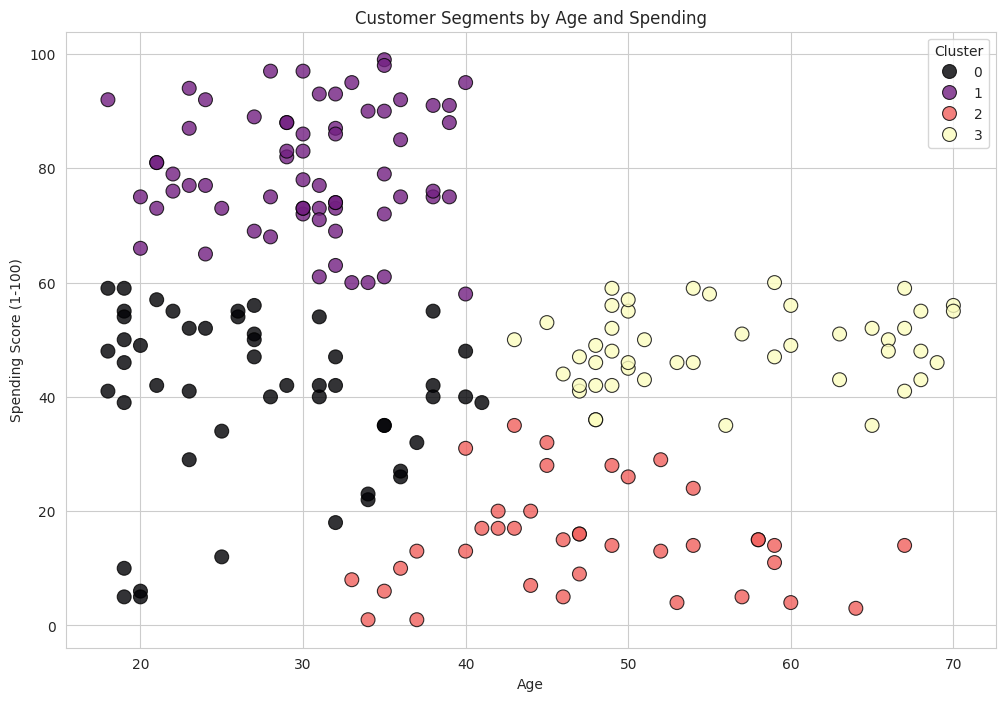

In [20]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)',
                hue='Age_Cluster', palette='magma', s=100, alpha=0.8, edgecolor='black')
plt.title('Customer Segments by Age and Spending')
plt.legend(title='Cluster')
plt.show()

Hierarchial Clustering and Dendrograms

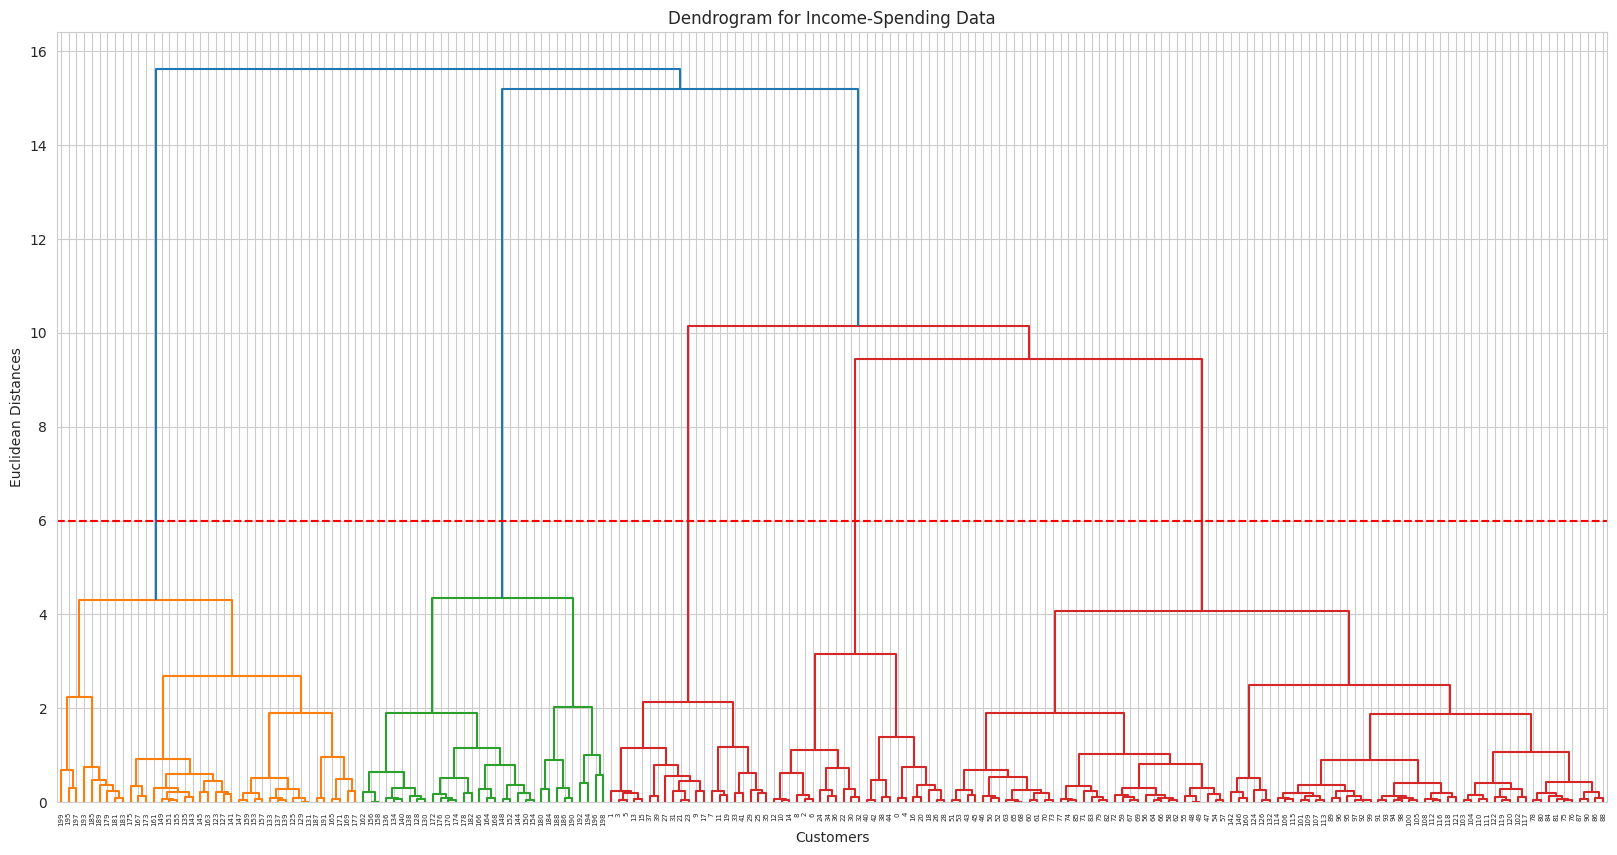

In [21]:
plt.figure(figsize=(20, 10))
dendrogram = sch.dendrogram(sch.linkage(X1_scaled, method='ward'))
plt.title('Dendrogram for Income-Spending Data')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.axhline(y=6, color='r', linestyle='--')
plt.show()

Create Segmentation based on Gender vs Spending score

In [22]:
X = df[['Gender', 'Spending Score (1-100)']]

In [23]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X['Gender'] = le.fit_transform(X['Gender'])

/tmp/ipython-input-539852305.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

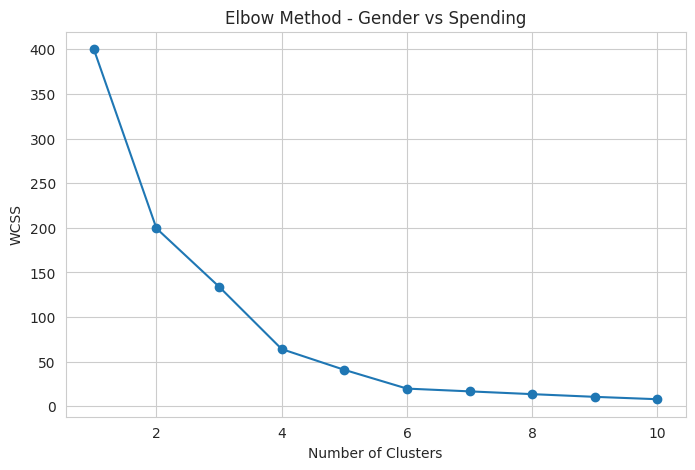

In [25]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1,11), wcss, marker='o')
plt.title("Elbow Method - Gender vs Spending")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()


In [27]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df['Gender_Spending_Cluster'] = clusters

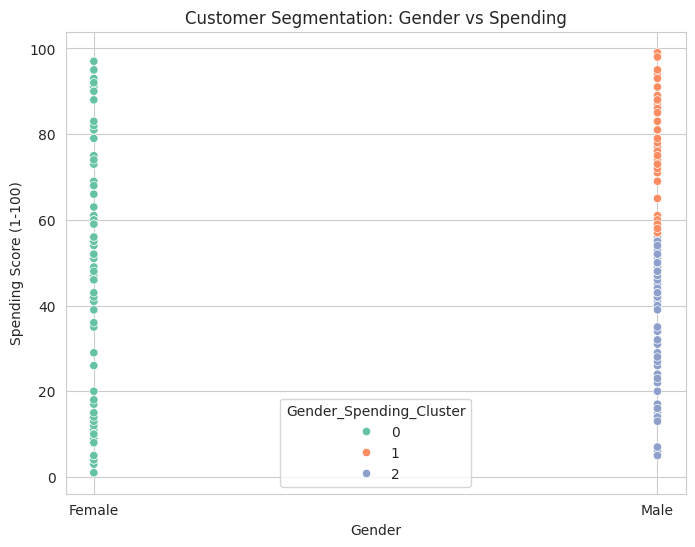

In [28]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(
    x='Gender',
    y='Spending Score (1-100)',
    hue='Gender_Spending_Cluster',
    data=df,
    palette='Set2'
)

plt.xticks([0,1], ['Female', 'Male'])
plt.title("Customer Segmentation: Gender vs Spending")
plt.show()


In [29]:
df.groupby('Gender_Spending_Cluster')[['Spending Score (1-100)']].mean()

,Spending Score (1-100)
Gender_Spending_Cluster,
0,48.511364
1,76.928571
2,36.285714


In [30]:
def age_group(age):
    if age < 25:
        return 'Young'
    elif age < 40:
        return 'Adult'
    elif age < 60:
        return 'Middle-Aged'
    else:
        return 'Senior'

df['Age_Group'] = df['Age'].apply(age_group)


In [31]:
def income_level(income):
    if income < 40:
        return 'Low'
    elif income < 70:
        return 'Medium'
    else:
        return 'High'

df['Income_Level'] = df['Annual Income (k$)'].apply(income_level)

In [32]:
def spending_category(score):
    if score < 35:
        return 'Low Spender'
    elif score < 65:
        return 'Average Spender'
    else:
        return 'High Spender'

df['Spending_Category'] = df['Spending Score (1-100)'].apply(spending_category)

In [33]:
df['Spending_to_Income_Ratio'] = (
    df['Spending Score (1-100)'] / df['Annual Income (k$)']
)

In [34]:
def customer_value(row):
    if row['Annual Income (k$)'] > 70 and row['Spending Score (1-100)'] > 65:
        return 'Premium Customer'
    elif row['Spending Score (1-100)'] > 65:
        return 'Impulse Spender'
    elif row['Annual Income (k$)'] > 70:
        return 'Potential High Value'
    else:
        return 'Regular Customer'

df['Customer_Value'] = df.apply(customer_value, axis=1)

In [35]:
df['Age_Spending_Index'] = df['Spending Score (1-100)'] / df['Age']

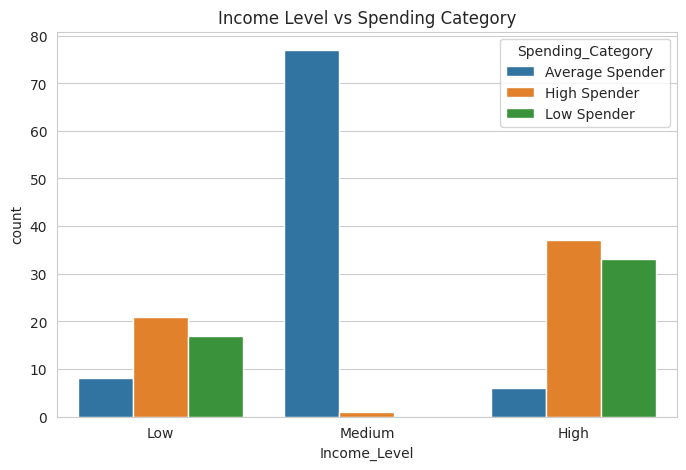

In [36]:
plt.figure(figsize=(8,5))
sns.countplot(
    x='Income_Level',
    hue='Spending_Category',
    data=df
)
plt.title("Income Level vs Spending Category")
plt.show()

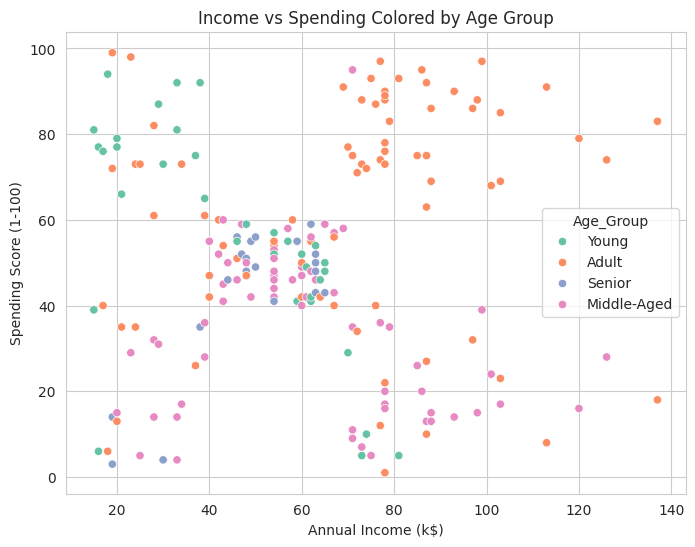

In [37]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Age_Group',
    data=df,
    palette='Set2'
)
plt.title("Income vs Spending Colored by Age Group")
plt.show()


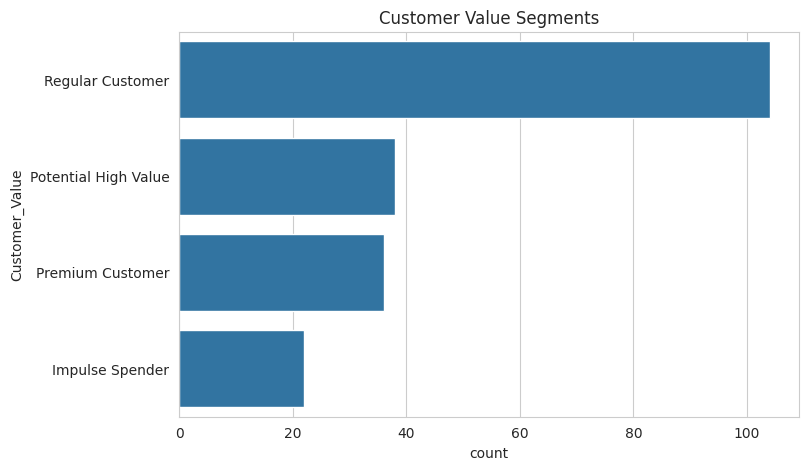

In [41]:
plt.figure(figsize=(8,5))
sns.countplot(
    y='Customer_Value',
    data=df,
    order=df['Customer_Value'].value_counts().index
)
plt.title("Customer Value Segments")
plt.show()